$x_i = f_i * t^2 / 2 + v_{i-1} * t + x_{i-1}$ <br>
Расписав иксы, можно заметить закономерность коэффициентов перед $f_i$.
Скорость, очевидно, растет линейно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = np.ones((2, 10))
for i in range(10):
    A[0,i] = (2 * (9 - i) + 1)/2
print(A)

[[9.5 8.5 7.5 6.5 5.5 4.5 3.5 2.5 1.5 0.5]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]]


In [2]:
u, s, vh = np.linalg.svd(A) #SVD here
sigma = np.zeros((2, 10))
sigma[0,0] = s[0]
sigma[1,1] = s[1]
vtc = vh.T.conj()
utc = u.T.conj()
a = [1, 0]
f = vtc @ np.linalg.pinv(sigma) @ utc @ a #Making A^(-1) using SVD
print(f) #Force

[ 0.05454545  0.04242424  0.03030303  0.01818182  0.00606061 -0.00606061
 -0.01818182 -0.03030303 -0.04242424 -0.05454545]


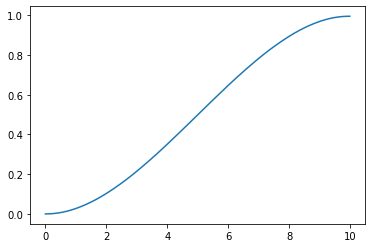

In [3]:
#x_i = f_i * t^2 / 2 + v_{i-1} * t + x_{i-1}
n = 1000
x = np.zeros(n)
v = np.zeros(n)

t = np.linspace(0, 10, n, endpoint=False)
for i in range(1, n):
    v[i] = f[int(np.floor(t[i]))]*(t[i]-t[i - 1]) + v[i - 1]
    x[i] = f[int(np.floor(t[i]))]*(t[i]-t[i - 1])**2 / 2 + v[i - 1]*(t[i]-t[i - 1]) + x[i - 1]
plt.plot(t, x)
plt.show()